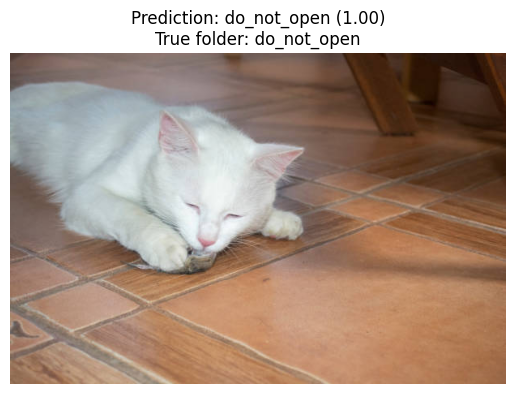

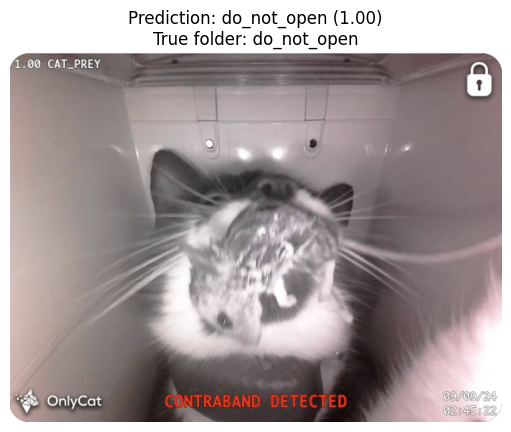

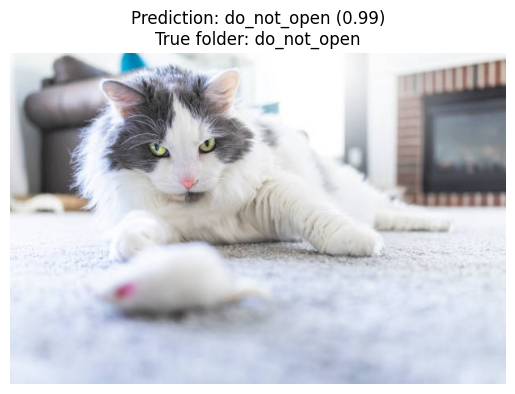

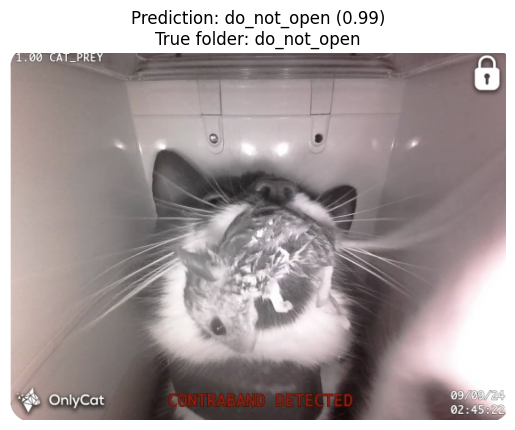

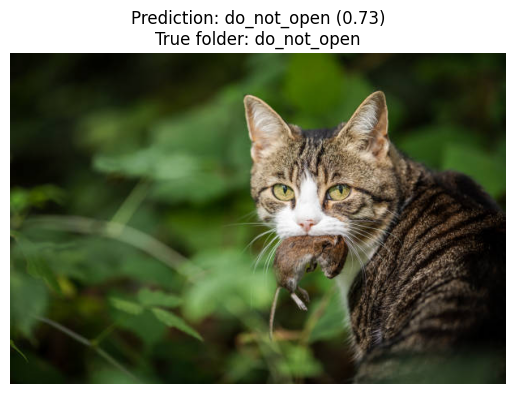

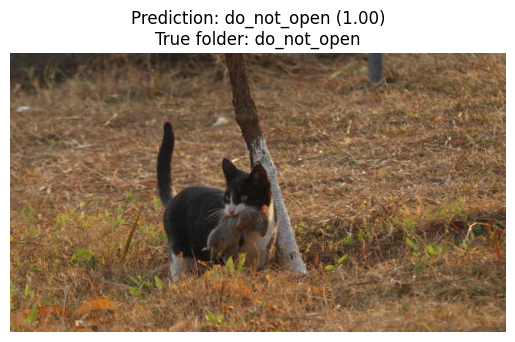

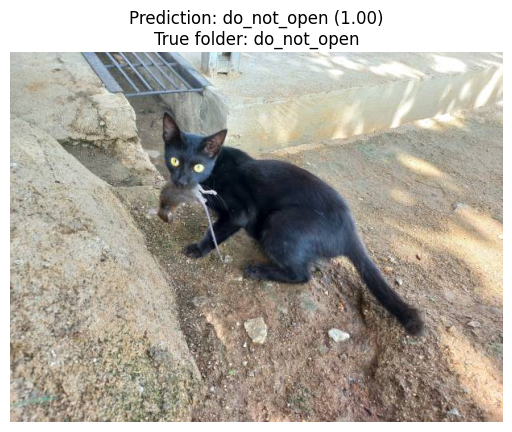

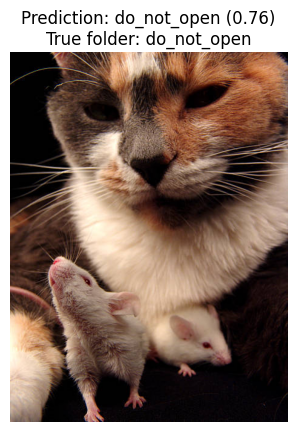

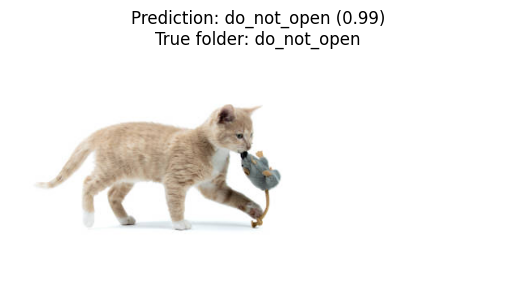

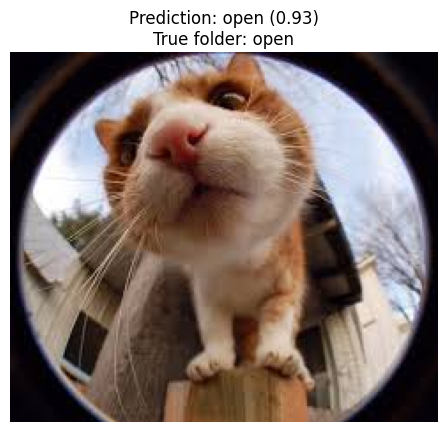

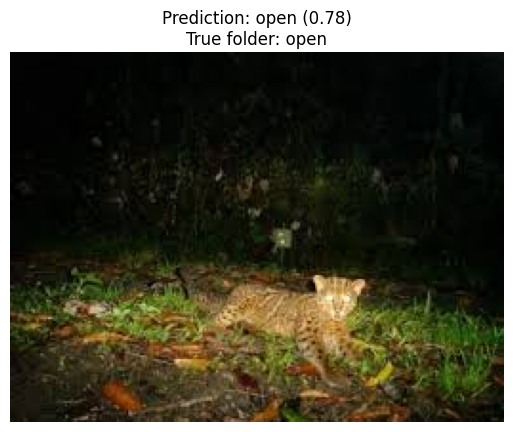

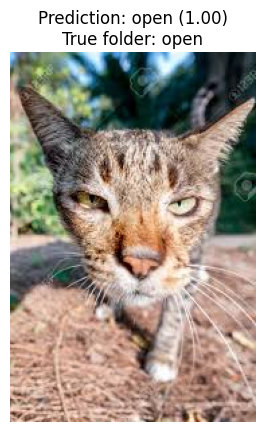

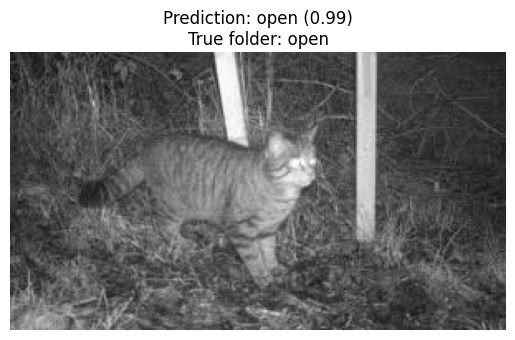

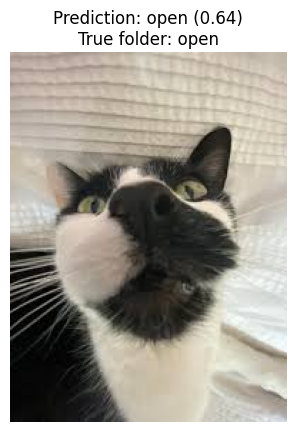

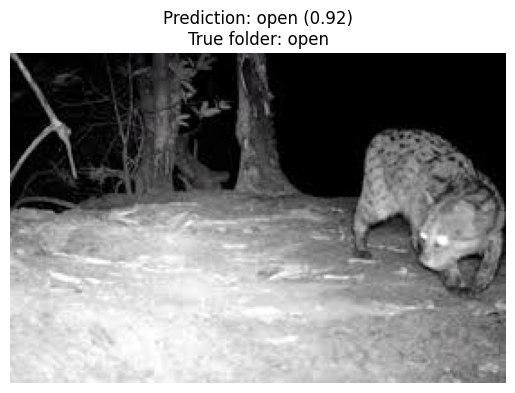

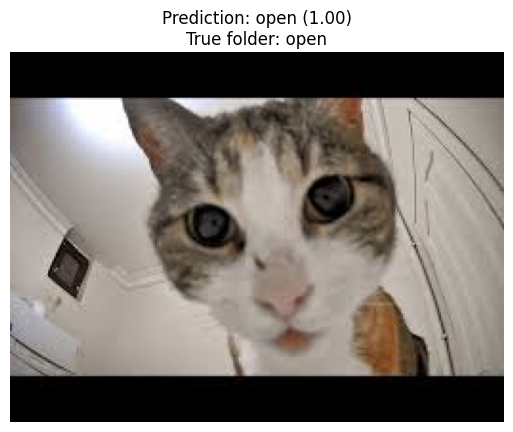

In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
import os

# Load your trained model
model = YOLO("runs/classify/catflap_classification3/weights/best.pt")  # Adjust path if needed

# Folder containing validation images
val_folder = "datasets/catflap/val"

# Collect all images
image_paths = glob.glob(os.path.join(val_folder, "*", "*.jpg"))  # Looks inside open/ and do_not_open/ folders

# Predict
results = model.predict(
    source=image_paths,
    save=False,
    conf=0.25,
    verbose=False
)

# Class names
class_names = model.names

# Display results
for img_path, res in zip(image_paths, results):
    pred_class = res.probs.top1  # predicted class index
    pred_conf = res.probs.top1conf  # confidence

    img = Image.open(img_path)
    plt.imshow(np.array(img))
    plt.title(f"Prediction: {class_names[pred_class]} ({pred_conf:.2f})\nTrue folder: {os.path.basename(os.path.dirname(img_path))}")
    plt.axis('off')
    plt.show()